<a href="https://colab.research.google.com/github/aghababaei-alireza/AI_Darsman/blob/main/Semester%206%20-%20Deep%20Learning/Learn/Part2-PyTorchLibrary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span dir="rtl" style="font-family:B Nazanin" align="right">
    <h1>فصل ششم: یادگیری عمیق</h1>
    <h2>بخش دوم: کتابخانه PyTorch و کاربرد آن در یادگیری عمیق</h2>
</span>

<p style="font-family:B Nazanin" dir="rtl" align="right">
     در این فصل می‌خواهیم با کتابخانه قدرتمند PyTorch آشنا شویم که به ما این امکان را می‌دهد تا مدل‌های هوش مصنوعی خود را آموزش دهیم و از آن‌ها استفاده کنیم. یکی از ویژگی‌های بارز PyTorch این است که این امکان را برای ما فراهم می‌کند که کدهای خود را توسط GPU (پردازنده‌های گرافیکی) اجرا کنیم که بسیار بسیار قدرتمندتر از CPUها هستند. ویژگی بسیار محبوب دیگر این کتابخانه این است که اجازه می‌دهد تا مدل خود را در حین اجرا تغییر دهیم و مشکلات آن را بسیار راحت پیدا کرده و برطرف کنیم. <br>
    برای نصب این کتابخانه با استفاده از pip، در محیط ترمینال از دستور زیر استفاده می‌کنیم:
</p>

In [ ]:
!pip3 install torch torchvision torchaudio

<p style="font-family:B Nazanin" dir="rtl">
    برای استفاده از این کتابخانه باید ماژول <code>torch</code> را وارد کنیم.
</p>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

<p style="font-family:B Nazanin" dir="rtl">
     یکی از مهم‌ترین قابلیت‌های کتابخانه PyTorch این است که می‌تواند کدها را روی GPU اجرا کند. برای بررسی این مورد که آیا GPU در دسترسی هست و می‌توانیم از آن استفاده کنیم دستور زیر را اجرا می‌کنیم:
</p>

In [ ]:
torch.cuda.is_available()

True

<p style="font-family:B Nazanin" dir="rtl">
    برای یافتن اطلاعات پردازنده گرافیکی که در حال حاضر فعال است از دستورات زیر در محیط ترمینال استفاده می‌کنیم:
</p>

In [ ]:
!nvidia-smi # برای پردازنده‌های گرافیکی برند NVIDIA

Fri Oct  4 14:02:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

<p style="font-family:B Nazanin" dir="rtl">
    <b>انواع داده در PyTorch:</b> در کتابخانه PyTorch نوع داده‌های زیر وجود دارد که مقادیر بر اساس این نوع داده‌ها می‌توانند ذخیره شوند:<br>
    * torch.float32 یا torch.float: اعداد اعشاری که 32 بیت فضا مصرف می‌کنند.<br>
    * torch.float64 یا torch.double: اعداد اعشاری دقیق‌تر که 64 بیت فضا مصرف می‌کنند.<br>
    * torch.float16 یا torch.half: اعداد اعشاری که 16 بیت فضا مصرف می‌کنند.<br>
    * torch.int8: اعداد صحیح 8 بیتی (از -128 تا +127)<br>
    * torch.int16 یا torch.short: اعداد صحیح 16 بیتی<br>
    * torch.int32 یا torch.int: اعداد صحیح 32 بیتی<br>
    * torch.int64 یا torch.long: اعداد صحیح 6 بیتی<br>
    * torch.uint8: اعداد صحیح بدون علامت 8 بیتی (از صفر تا 255)<br>
    * torch.bool: متغیرهای منطقی (درست یا غلط)<br>
    * torch.bfloat16: اعداد اعشاری بهبودیافته نوع float با اندازه 32 بیت
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>تنسور:</b><br>
    همان طور که می‌دانید مقادیر و داده‌ها می‌توانند در چند بعد ایجاد و ذخیره شوند. <br>
    داده‌های تکی یا بدون بعد را داده‌های اسکالر می‌گویند. مانند 25 یا 12.3. <br>
    داده‌هایی که در یک بعد ذخیره شوند را بردار می‌گویند. مانند:‌ [1,2,3] <br>
    داده‌هایی که در دو بعد ذخیره شوند را ماتریس می‌گویند. مانند: [[1,2,3],[4,5,6]]<br>
    داده‌هایی که در ابعاد بزرگتر از دو ایجاد شوند را تنسور (Tensor) می‌گویند.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    تمامی داده‌ها از اسکالر تا داده‌های چندبعدی را می‌تواند در قالب تنسور در کتابخانه PyTorch ایجاد کرد. برای ایجاد داده اسکالر به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
scaler_data1 = torch.tensor(12)
print(scaler_data1)

tensor(12)


<p style="font-family:B Nazanin" dir="rtl">
    نوع داده‌ای این متغیر را به صورت زیر می‌توانیم ببینیم:
</p>

In [ ]:
scaler_data1.dtype

torch.int64

<p style="font-family:B Nazanin" dir="rtl">
    ابعاد این متغیر را به صورت زیر می‌توانیم ببینیم:
</p>

In [ ]:
scaler_data1.shape

torch.Size([])

In [ ]:
scaler_data1.size()

torch.Size([])

<p style="font-family:B Nazanin" dir="rtl">
    برای اینکه ببینیم این متغیر روی چه دستگاهی (cpu یا gpu) ایجاد شده است، از دستور زیر استفاده می‌کنیم:
</p>

In [ ]:
scaler_data1.device

device(type='cpu')

<p style="font-family:B Nazanin" dir="rtl">
    با اینکه استفاده از GPU فعال شده است ولی به صورت پیش‌فرض متغیرها روی CPU ساخته می‌شوند. برای ایجاد متغیر روی GPU در هنگام ساخت متغیر باید این مسئله را مشخص کنیم.
</p>

In [ ]:
scaler_data2 = torch.tensor(56.7)
print(scaler_data2)
print(scaler_data2.dtype)
print(scaler_data2.shape)
print(scaler_data2.device)

tensor(56.7000)
torch.float32
torch.Size([])
cpu


In [ ]:
scaler_data3 = torch.tensor(True)
print(scaler_data3)
print(scaler_data3.dtype)
print(scaler_data3.shape)
print(scaler_data3.device)

tensor(True)
torch.bool
torch.Size([])
cpu


In [ ]:
scaler_data4 = torch.tensor(12, dtype=torch.float64)
print(scaler_data4)
print(scaler_data4.dtype)
print(scaler_data4.shape)
print(scaler_data4.device)

tensor(12., dtype=torch.float64)
torch.float64
torch.Size([])
cpu


<p style="font-family:B Nazanin" dir="rtl">
    برای ایجاد یک متغیر روی GPU باید مقدار پارامتر device را هنگام تعریف متغیر برابر با cuda بگذاریم.
</p>

In [ ]:
scaler_data5 = torch.tensor(12, dtype=torch.float64, device='cuda')
print(scaler_data5)
print(scaler_data5.dtype)
print(scaler_data5.shape)
print(scaler_data5.device)

tensor(12., device='cuda:0', dtype=torch.float64)
torch.float64
torch.Size([])
cuda:0


<p style="font-family:B Nazanin" dir="rtl">
    برای ایجاد بردار در قالب تنسور به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
vector_data1 = torch.tensor([213,54,5,5,4,343,234])
print(vector_data1)
print(vector_data1.dtype)
print(vector_data1.shape)

tensor([213,  54,   5,   5,   4, 343, 234])
torch.int64
torch.Size([7])


<p style="font-family:B Nazanin" dir="rtl">
    اگر حتی یکی از اعداد بردارد به صورت اعشاری باشد، کل بردار به صورت اعشاری ذخیره می‌شود:
</p>

In [ ]:
vector_data2 = torch.tensor([3,5,6.45,30,41])
print(vector_data2)
print(vector_data2.dtype)
print(vector_data2.shape)

tensor([ 3.0000,  5.0000,  6.4500, 30.0000, 41.0000])
torch.float32
torch.Size([5])


<p style="font-family:B Nazanin" dir="rtl">
    برای ذخیره کردن ماتریس‌ها به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
mat_data1 = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
])
print(mat_data1)
print(mat_data1.dtype)
print(mat_data1.shape)
print(mat_data1.size())
print(mat_data1.device)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
torch.int64
torch.Size([4, 3])
torch.Size([4, 3])
cpu


In [ ]:
print(mat_data1.shape[0])

4


<p style="font-family:B Nazanin" dir="rtl">
    برای تعریف تنسور (داده‌های چندبعدی) به صورت زیر عمل می‌کنیم:
</p>

In [ ]:
td_data1 = torch.tensor([
    [[1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]],
    [[1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]]
])
print(td_data1)
print(td_data1.dtype)
print(td_data1.shape)
print(td_data1.device)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],

        [[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]]])
torch.int64
torch.Size([2, 4, 3])
cpu


<p style="font-family:B Nazanin" dir="rtl">
    متغیری که روی CPU تعریف شده است را با استفاده از تابع <code>cuda()</code> می‌توان به یک متغیر که روی GPU‌ تعریف شده است، تبدیل کرد.
</p>

In [ ]:
td_data1 = td_data1.cuda()
print(td_data1.device)

cuda:0


<p style="font-family:B Nazanin" dir="rtl">
    برای تغییر نوع داده یک متغیر به دو روش می‌توان عمل کرد. روش اول استفاده از یک تابع است همنام با نوع داده‌ای که می‌خواهیم به متغیر را به آن تغییر دهیم. مثلا اگر می‌خواهیم یک متغیر صحیح را به اعشاری تبدیل کنیم، از تابع <code>float()</code> استفاده می‌کنیم.
</p>

In [ ]:
data1 = torch.tensor([12,345,67,72])
print(data1.dtype)

torch.int64


In [ ]:
data1 = data1.float()
print(data1.dtype)

torch.float32


<p style="font-family:B Nazanin" dir="rtl">
    روش دوم استفاده از تابع <code>type()</code> است که نوع داده مورد نظر را به عنوان ورودی به آن می‌دهیم:
</p>

In [ ]:
data1 = data1.type(torch.float16)
print(data1.dtype)

torch.float16


<p style="font-family:B Nazanin" dir="rtl">
    توابع پرکاربردی که در هنگام کار با تنسورها استفاده می‌شود به صورت زیر است:
</p>

In [ ]:
data2 = torch.tensor([
    [12,345,67,-72,67,24,46,78,21,-12,67,45],
    [55,345,32,16,32,-6,17,78,49,-87,25,11]
])

In [ ]:
print(f'Data: {data2}')

Data: tensor([[ 12, 345,  67, -72,  67,  24,  46,  78,  21, -12,  67,  45],
        [ 55, 345,  32,  16,  32,  -6,  17,  78,  49, -87,  25,  11]])


In [ ]:
print(f'Data Float: {data2.float()}')

Data Float: tensor([[ 12., 345.,  67., -72.,  67.,  24.,  46.,  78.,  21., -12.,  67.,  45.],
        [ 55., 345.,  32.,  16.,  32.,  -6.,  17.,  78.,  49., -87.,  25.,  11.]])


In [ ]:
print(f'Min: {data2.min()}')

Min: -87


In [ ]:
print(f'Max: {data2.max()}')

Max: 345


In [ ]:
print(f'Sum: {data2.sum()}')

Sum: 1255


In [ ]:
print(f'Mode: {data2.float().mode()}')

Mode: torch.return_types.mode(
values=tensor([67., 32.]),
indices=tensor([10,  4]))


In [ ]:
print(f'Median: {data2.float().median()}')

Median: 32.0


In [ ]:
print(f'Mean: {data2.float().mean()}')

Mean: 52.29166793823242


In [ ]:
print(f'Var: {data2.float().var()}')

Var: 9785.171875


In [ ]:
print(f'Std: {data2.float().std()}')

Std: 98.92002868652344


In [ ]:
print(f'Abs: {data2.abs()}')

Abs: tensor([[ 12, 345,  67,  72,  67,  24,  46,  78,  21,  12,  67,  45],
        [ 55, 345,  32,  16,  32,   6,  17,  78,  49,  87,  25,  11]])


In [ ]:
print(f'Transpose: {data2.t()}')

Transpose: tensor([[ 12,  55],
        [345, 345],
        [ 67,  32],
        [-72,  16],
        [ 67,  32],
        [ 24,  -6],
        [ 46,  17],
        [ 78,  78],
        [ 21,  49],
        [-12, -87],
        [ 67,  25],
        [ 45,  11]])


<p style="font-family:B Nazanin" dir="rtl">
    برای گرد کردن اعداد از توابع زیر می‌توانیم استفاده کنیم:‌<br>
    * تابع <code>ceil()</code>: اعداد را به اولین عدد صحیح بزرگتر از خودش گرد می‌کند.<br>
    * تابع <code>floor()</code>: اعداد را به اولین عدد کوچکتر از خودش گرد می‌کند. <br>
    * تابع <code>fix()</code>: قسمت اعشار عدد را حذف می‌کند و قسمت صحیح را نگه می‌دارد.<br>
    * تابع <code>round()</code>: اعداد را به نزدیک‌ترین عدد صحیح گرد می‌کند.
</p>

In [ ]:
data3 = torch.tensor([2.3456, 15.890324, 9., -3.48, 3.48, 17.6210, 100, 99.999])
print(f'Data\t:\t{data3}')
print(f'Ceil\t:\t{data3.ceil()}')
print(f'Floor\t:\t{data3.floor()}')
print(f'Fix\t:\t{data3.fix()}')
print(f'Round\t:\t{data3.round()}')

Data	:	tensor([  2.3456,  15.8903,   9.0000,  -3.4800,   3.4800,  17.6210, 100.0000,
         99.9990])
Ceil	:	tensor([  3.,  16.,   9.,  -3.,   4.,  18., 100., 100.])
Floor	:	tensor([  2.,  15.,   9.,  -4.,   3.,  17., 100.,  99.])
Fix	:	tensor([  2.,  15.,   9.,  -3.,   3.,  17., 100.,  99.])
Round	:	tensor([  2.,  16.,   9.,  -3.,   3.,  18., 100., 100.])


<p style="font-family:B Nazanin" dir="rtl">
    توابع <code>argmax()</code> و <code>argmin()</code> اندیس بزرگترین و کوچکترین داده‌های یک تنسور را مشخص می‌کند.
</p>

In [ ]:
data4 = torch.tensor([2, 45, 15, 9., -3, 3, 17, 99, 38, 26])
print(f'Data\t:\t{data4}')
print(f'Argmax\t:\t{torch.argmax(data4)}')
print(f'Argmin\t:\t{torch.argmin(data4)}')

Data	:	tensor([ 2., 45., 15.,  9., -3.,  3., 17., 99., 38., 26.])
Argmax	:	7
Argmin	:	4


<p style="font-family:B Nazanin" dir="rtl">
    تابع <coed>topk()</code> با گرفتن پارامتر k، تعداد kتا از بزرگترین داده‌های تنسور را برمی‌گرداند.
</p>

In [ ]:
print(f'topk:\n{torch.topk(data4, 3)}')

topk:
torch.return_types.topk(
values=tensor([99., 45., 38.]),
indices=tensor([7, 1, 8]))


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>norm()</code>، نرم یک تنسور را محاسبه می‌کند. در مثال زیر، نرم اقلیدسی محاسبه شده است:
</p>

In [ ]:
print(f'Euclidean Norm (L2 Norm): {torch.norm(data4, p=2)}')

Euclidean Norm (L2 Norm): 120.67725372314453


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>remainder()</code> باقیمانده تقسیم داده‌های یک تنسور بر یک عدد مشخص را محاسبه می‌کند:
</p>

In [ ]:
print(f'Remainder of division by 7: {torch.remainder(data4, 7)}')

Remainder of division by 7: tensor([2., 3., 1., 2., 4., 3., 3., 1., 3., 5.])


<p style="font-family:B Nazanin" dir="rtl">
    برای تابعی مانند <code>sum()</code> می‌توان پارامتر دومی را مشخص کرد که به جای محاسبه مجموع همه اعداد تنسور، مجموع اعداد هر یک از ابعاد را مشخص کند.
</p>

In [ ]:
data3 = torch.tensor([1,2,3,4,5,8])
data4 = torch.tensor([[1,2,3,4,5,8], [10, 20, 30, 40, 50, 80]])

print(torch.sum(data3, 0))
print(torch.sum(data4, 1))

tensor(23)
tensor([ 23, 230])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>cumsum()</code> مجموع تجمعی داده‌های تنسور، تابع <code>prod</code> حاصل‌ضرب داده‌های تنسور، تابع <code>cumprod()</code> حاصل‌ضرب تجمعی داده‌های تنسور و تابع <code>diff</code> اختلاف داده‌های مجاور در تنسور را محاسبه می‌کند.
</p>

In [ ]:
print(torch.cumsum(data3, 0))
print(torch.prod(data3, 0))
print(torch.cumprod(data3, 0))
print(torch.diff(data3, 0))

tensor([ 1,  3,  6, 10, 15, 23])
tensor(960)
tensor([  1,   2,   6,  24, 120, 960])
tensor([1, 2, 3, 4, 5, 8])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>exp2()</code>، 2 به توان داده‌های تنسور را محاسبه می‌کند و تابع <code>log2()</code>، لگاریتم داده‌های تنسور را مشخص می‌کند.
</p>

In [ ]:
data1 = torch.tensor([1,2,3,4,5,6])
data2 = data1.exp2()
data3 = data2.log2()

print(f'data1:\t{data1}')
print(f'data2:\t{data2}')
print(f'data3:\t{data3}')

data1:	tensor([1, 2, 3, 4, 5, 6])
data2:	tensor([ 2.,  4.,  8., 16., 32., 64.])
data3:	tensor([1., 2., 3., 4., 5., 6.])


<p style="font-family:B Nazanin" dir="rtl">
    توابع <code>square()</code> و <code>sqrt()</code> به ترتیب مجذور و جذر داده‌ّای تنسور را محاسبه می‌کند.
</p>

In [ ]:
data1 = torch.tensor([1,2,3,4,5,6])
data2 = data1.square()
data3 = data2.sqrt()

print(f'data1:\t{data1}')
print(f'data2:\t{data2}')
print(f'data3:\t{data3}')

data1:	tensor([1, 2, 3, 4, 5, 6])
data2:	tensor([ 1,  4,  9, 16, 25, 36])
data3:	tensor([1., 2., 3., 4., 5., 6.])


<p style="font-family:B Nazanin" dir="rtl">
    برخی از توابع در این کتابخانه در انتهای نامشان یک کاراکتر _ دارند. این توابع دقیقا مشابه با تابع هم‌نامشان (بدون _) عمل می‌کنند با این تفاوت که در انتها مقدار محاسبه شده را درون خود تنسور می‌ریزند. مثلا تابع <code>ceil</code> اعداد تنسور را رو به بالا گرد می‌کند و یک تنسور جدید خروجی می‌دهد و به تنسور اولیه دست نمی‌زند. اما تابع <code>ceil_()</code> مقادیر جدید را درون همان تنسور اولیه اصلاح می‌کند.
</p>

In [ ]:
data3 = torch.tensor([2.3456, 15.890324, 9., 17.6210, 20.43, 99.999])
print(f'Data\t:\t{data3}')
print(f'Ceil\t:\t{data3.ceil_()}')
print(f'Data\t:\t{data3}')

Data	:	tensor([ 2.3456, 15.8903,  9.0000, 17.6210, 20.4300, 99.9990])
Ceil	:	tensor([  3.,  16.,   9.,  18.,  21., 100.])
Data	:	tensor([  3.,  16.,   9.,  18.,  21., 100.])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>dist()</code> فاصله بین دو بردار را محاسبه می‌کند.
</p>

In [ ]:
data1 = torch.tensor([2., 15, 9, 17, 20, 99])
data2 = torch.tensor([4, 12., 3, 26, 48, 31])
torch.dist(data1, data2, p=2) # p=2: Euclidean distance

tensor(74.4177)

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>range()</code> دقیقا مانند تابع range در پایتون عمل می‌کند و بازه‌ای از اعداد را می‌سازد و به تنسور تبدیل می‌کند.
</p>

In [ ]:
vdata = torch.range(1, 20, 2)
print(vdata)

tensor([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19.])


<ipython-input-72-72a232c17115>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  vdata = torch.range(1, 20, 2)


<p style="font-family:B Nazanin" dir="rtl">
    توابع <code>ones()</code> و <code>zeros()</code> و <code>empty()</code> و <code>eye()</code> به ترتیب برای ساختن ماتریس با اعضای یک، ماتریس با اعضای صفر، ماتریس با اعضایی که مقداردهی اولیه نشده و ماتریس همانی استفاده می‌شود.
</p>

In [ ]:
shape = (3,5)
data_ones = torch.ones(shape)
data_zeros = torch.zeros(shape)
data_empty = torch.empty(shape)
data_eye = torch.eye(5)

print(f'Ones:\n{data_ones}')
print(f'Zeros:\n{data_zeros}')
print(f'Empty:\n{data_empty}')
print(f'Eye:\n{data_eye}')

Ones:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
Zeros:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
Empty:
tensor([[2.8183e+20, 6.1972e-04, 1.4585e-19, 7.2708e+31, 7.1430e+31],
        [1.5766e-19, 7.0295e+28, 1.6312e+19, 7.0976e+22, 1.8609e+34],
        [1.8315e+25, 7.5551e+31, 6.1960e-04, 3.1457e-12, 2.7340e+20]])
Eye:
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>rand()</code> یک تنسور با اعداد تصادفی می‌سازد که اعداد بین صفر تا یک هستند. تابع <code>randn()</code> یک تنسور با اعداد تصادفی که توزیع نرمال دارند می‌سازد. تابع <code>randint()</code> نیز یک تنسور با اعداد صحیح تصادفی در یک بازه مشخص می‌سازد.
</p>

In [ ]:
data_rand1 = torch.rand((2,5))
print(data_rand1)

tensor([[0.4081, 0.5655, 0.4506, 0.0584, 0.7707],
        [0.1064, 0.6604, 0.2750, 0.4928, 0.4923]])


(array([13., 12.,  8., 15.,  8., 14.,  6.,  7., 14.,  7., 11.,  8.,  5.,
        11., 12.,  8.,  9.,  7., 15.,  5., 18.,  8.,  8.,  9., 18., 13.,
         8., 15., 13., 13., 15., 11.,  6., 10.,  6.,  5., 11.,  6., 15.,
         9.,  9., 11., 12., 13.,  7.,  8., 17.,  5., 10., 14.,  9.,  2.,
        11., 11.,  6., 10., 10.,  6.,  8., 13.,  6.,  6.,  8.,  7., 13.,
        10., 14.,  9., 12.,  9., 10., 10., 11., 15.,  8.,  9., 12., 15.,
        11.,  4., 12.,  6.,  7.,  8., 14., 18.,  9., 10.,  4., 12.,  9.,
        12.,  7.,  6.,  8.,  9., 13., 12., 11., 10.]),
 array([1.01447105e-04, 1.00952126e-02, 2.00889781e-02, 3.00827436e-02,
        4.00765091e-02, 5.00702746e-02, 6.00640401e-02, 7.00578019e-02,
        8.00515711e-02, 9.00453329e-02, 1.00039102e-01, 1.10032864e-01,
        1.20026633e-01, 1.30020395e-01, 1.40014157e-01, 1.50007933e-01,
        1.60001695e-01, 1.69995457e-01, 1.79989219e-01, 1.89982995e-01,
        1.99976757e-01, 2.09970519e-01, 2.19964281e-01, 2.29958057e-01,
  

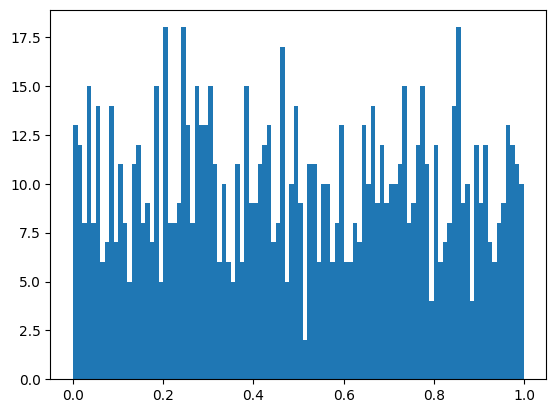

In [ ]:
data_rand2 = torch.rand(1000)
plt.hist(data_rand2, 100)

In [ ]:
data_rand3 = torch.randn(100)
print(data_rand3)

tensor([-0.8983, -0.0312, -2.0338,  0.4070,  0.5947,  1.0142, -0.7297, -1.1987,
         0.3591,  1.1901,  0.1697, -0.7105, -1.8266, -2.2333,  0.3247,  0.6451,
         0.3730, -0.7942, -0.1730, -0.7379, -0.1594, -0.1379, -1.1123, -0.8680,
        -1.3311, -1.1035, -0.1235,  0.9662, -0.9300, -1.3529,  1.8491,  0.2847,
         0.6409, -0.0376, -1.2922, -0.8869,  0.8834, -0.2160,  0.7924,  0.5654,
        -0.4592,  0.6580, -0.9975, -0.2891,  0.5465,  1.3077,  0.4468,  0.5659,
        -0.8442, -0.5672,  0.1233, -0.6788,  1.9339, -0.8766,  0.6033, -0.9545,
        -0.6315, -0.3161,  0.4726,  1.1513,  1.3032, -1.1656, -0.1219, -1.1784,
        -0.2130,  2.2757,  0.6841, -0.5505,  1.7227,  2.0511, -0.6771,  1.1494,
         0.2680, -1.5438,  0.0584, -0.7475,  0.0612,  0.1710, -1.3533, -1.1439,
        -0.1099,  0.7114,  1.2616,  0.3221,  1.2310, -0.0203,  0.8379, -0.3470,
        -1.1461, -0.9047, -0.3420, -1.5056,  1.4937, -0.5969, -1.2593,  0.2194,
         1.8472,  0.5976, -1.4234,  0.80

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  4.,  2.,  1.,  1.,  0.,  1.,  4.,  2.,  2.,  6.,  8.,  6.,
         2.,  6.,  7.,  3.,  8.,  8., 10.,  8., 15., 10., 16., 16., 12.,
        13., 21., 12., 24., 30., 21., 23., 26., 30., 28., 31., 19., 23.,
        29., 23., 25., 28., 24., 21., 30., 24., 23., 16., 19., 28., 24.,
        16., 20., 19.,  7.,  8., 19., 11., 11., 11., 10., 13., 11.,  9.,
         8., 11.,  4.,  3.,  3.,  2.,  4.,  0.,  1.,  5.,  2.,  2.,  2.,
         3.,  0.,  2.,  3.,  0.,  1.,  1.,  0.,  1.]),
 array([-3.33315539, -3.27063894, -3.20812225, -3.1456058 , -3.08308911,
        -3.02057266, -2.95805621, -2.89553952, -2.83302307, -2.77050638,
        -2.70798993, -2.64547348, -2.58295679, -2.52044034, -2.45792365,
        -2.3954072 , -2.33289075, -2.27037406, -2.20785761, -2.14534092,
        -2.08282447, -2.02030802, -1.95779133, -1.89527488, -1.83275831,
        -1.77024174, -1.70772517, -1.6452086 , -1.58269215, -1.520175

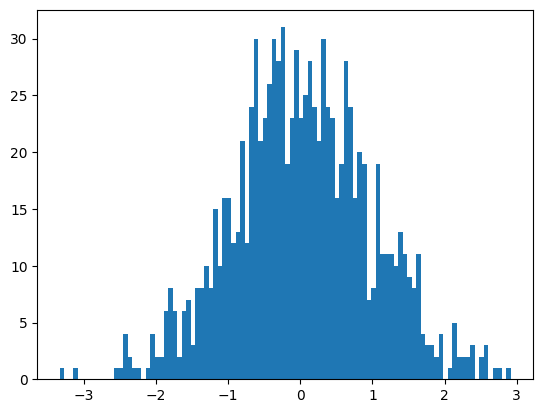

In [ ]:
data_rand4 = torch.randn(1000)
plt.hist(data_rand4, 100)

In [ ]:
shape = (3,5)
data_rand_int1 = torch.randint(1, 10, shape)
print(data_rand_int1)

tensor([[3, 5, 1, 4, 1],
        [7, 2, 3, 9, 6],
        [8, 1, 6, 5, 2]])


In [ ]:
data_rand_int2 = torch.randint(1, 10, (1,))
print(data_rand_int2)

tensor([9])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>item()</code> برای تنسورهایی که فقط یک عنصر دارند، مقدار آن عنصر را برمی‌گرداند.
</p>

In [ ]:
data_rand_int3 = torch.randint(3, 21, (1,)).item()
print(data_rand_int3)
print(type(data_rand_int3))

15
<class 'int'>


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>randperm()</code> تنسوری از اعداد تصادفی غیرتکراری ایجاد می‌کند.
</p>

In [ ]:
data_rand_perm = torch.randperm(10)
print(data_rand_perm)

tensor([9, 3, 4, 7, 5, 6, 0, 8, 2, 1])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>repeat()</code> یک تنسور می‌گیرد و به تعداد مشخص‌شده آن را تکرار می‌کند.
</p>

In [ ]:
vdata = torch.tensor([1,3,5,6])
print(vdata)

mat_data = vdata.repeat(3)
print(mat_data)

mat_data = vdata.repeat((3,2))
print(mat_data)

tensor([1, 3, 5, 6])
tensor([1, 3, 5, 6, 1, 3, 5, 6, 1, 3, 5, 6])
tensor([[1, 3, 5, 6, 1, 3, 5, 6],
        [1, 3, 5, 6, 1, 3, 5, 6],
        [1, 3, 5, 6, 1, 3, 5, 6]])


<p style="font-family:B Nazanin" dir="rtl">
    تابع <cod>zero_()</code> که روی یک تنسور اعمال می‌شود، تمام داده‌های آن تنسور را به صفر تبدیل می‌کند.
</p>

In [ ]:
data = torch.randint(1,21,(5,5))
data

tensor([[12,  4, 20, 18, 15],
        [ 6,  3, 11,  6,  8],
        [20, 17,  7, 12,  1],
        [ 2,  5, 10, 13, 12],
        [13, 17, 13, 16,  1]])

In [ ]:
data.zero_()
data

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>fill_(n)</code> یک پارامتر ورودی می‌گیرد و همه داده‌های یک تنسور را با آن عدد جایگزین می‌کند.
</p>

In [ ]:
data.fill_(1)
data

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>eye</code> نیز ماتریس همانی یا یکه می‌سازد.
</p>

In [ ]:
torch.eye(data.shape[1])

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>zeros_like()</code> یک تنسور به عنوان ورودی می‌گیرد و یک تنسور که همه داده‌های آن صفر است و ابعاد آن به اندازه ابعاد تنسور ورودی است، می‌سازد.
</p>

In [ ]:
z = torch.zeros_like(data)
z

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

<p style="font-family:B Nazanin" dir="rtl">
    عملیات جمع، تفریق، ضرب و تقسیم را می‌توان روی تنسورها انجام داد که درایه به درایه روی داده‌های تنسورها انجام می‌شود.
</p>

In [ ]:
v1 = torch.randint(1, 21, (8,))
v2 = torch.randint(1, 21, (8,))
v3 = torch.randint(1, 21, (10,))

print(f'Vector1: {v1}')
print(f'Vector2: {v2}')
print(f'Vector3: {v3}')

Vector1: tensor([20, 13,  8,  6,  2, 19, 12,  9])
Vector2: tensor([ 9, 15, 15,  3,  3,  7,  1, 11])
Vector3: tensor([ 1,  1, 14,  1, 16, 10, 20, 10, 15,  5])


In [ ]:
print(f'v1 + v2 => {v1+v2}')
# print(f'v1 + v3 => {v1+v3}') # Error
print(f'v1 - v2 => {v1-v2}')
print(f'v1 * v2 => {v1*v2}')
print(f'v1 / v2 => {v1/v2}')

v1 + v2 => tensor([29, 28, 23,  9,  5, 26, 13, 20])
v1 - v2 => tensor([11, -2, -7,  3, -1, 12, 11, -2])
v1 * v2 => tensor([180, 195, 120,  18,   6, 133,  12,  99])
v1 / v2 => tensor([ 2.2222,  0.8667,  0.5333,  2.0000,  0.6667,  2.7143, 12.0000,  0.8182])


In [ ]:
mat1 = torch.randint(1, 21, (3,4))
mat2 = torch.randint(1, 21, (3,4))
mat3 = torch.randint(1, 21, (4,7))

print(f'Matrix1:\n{mat1}')
print(f'Matrix2:\n{mat2}')
print(f'Matrix3:\n{mat3}')

Matrix1:
tensor([[14, 14,  3, 13],
        [14, 18,  9, 16],
        [14,  6,  4, 18]])
Matrix2:
tensor([[18, 19,  1, 13],
        [16, 12,  9, 16],
        [15,  4,  1, 11]])
Matrix3:
tensor([[14, 19, 18, 10, 14,  3,  3],
        [ 9,  6, 13,  1,  1, 13, 15],
        [17, 13, 15, 16, 11, 18,  6],
        [ 8, 20,  9, 11,  6, 18,  8]])


In [ ]:
print(f'mat1 + mat2 => \n{mat1+mat2}')
print(f'mat1 - mat2 => \n{mat1-mat2}')
print(f'mat1 * mat2 => \n{mat1*mat2}')
print(f'mat1 / mat2 => \n{mat1/mat2}')

mat1 + mat2 => 
tensor([[32, 33,  4, 26],
        [30, 30, 18, 32],
        [29, 10,  5, 29]])
mat1 - mat2 => 
tensor([[-4, -5,  2,  0],
        [-2,  6,  0,  0],
        [-1,  2,  3,  7]])
mat1 * mat2 => 
tensor([[252, 266,   3, 169],
        [224, 216,  81, 256],
        [210,  24,   4, 198]])
mat1 / mat2 => 
tensor([[0.7778, 0.7368, 3.0000, 1.0000],
        [0.8750, 1.5000, 1.0000, 1.0000],
        [0.9333, 1.5000, 4.0000, 1.6364]])


<p style="font-family:B Nazanin" dir="rtl">
    دقت کنید که عملیات ضربی که در بالا به آن اشاره شد، ضرب ماتریسی نیست، بلکه ضرب درایه به درایه است. برای انجام ضرب ماتریسی از عملگر @ استفاده می‌کنیم. همچنین برای این کار از تابع <code>matmul</code> نیز می‌توان استفاده کرد.
</p>

In [ ]:
print(f'mat1 * mat3 =>\n{mat1 @ mat3}')

mat1 * mat3 =>
tensor([[477, 649, 596, 345, 321, 512, 374],
        [639, 811, 765, 478, 409, 726, 494],
        [462, 714, 552, 408, 354, 516, 300]])


In [ ]:
print(f'mat1 * mat3 =>\n{torch.matmul(mat1, mat3)}')

mat1 * mat3 =>
tensor([[477, 649, 596, 345, 321, 512, 374],
        [639, 811, 765, 478, 409, 726, 494],
        [462, 714, 552, 408, 354, 516, 300]])


<p style="font-family:B Nazanin" dir="rtl">
    برای دسترسی به داده‌های درون یک تنسور از اندیس‌ها استفاده می‌کنیم. می‌دانیم که اندیس‌ها از صفر شروع می‌شوند. همچنین اندیس‌های منفی نیز وجود دارند که از انتهای تنسور شمرده می‌شوند.
</p>

In [ ]:
torch.manual_seed(42)
vector_data = torch.randint(1, 21, (8,))
vector_data

tensor([ 3,  8, 17, 15,  7, 16,  1,  5])

In [ ]:
print(vector_data[0])
print(vector_data[2])
print(vector_data[-1])

tensor(3)
tensor(17)
tensor(5)


In [ ]:
mat_data = torch.randint(1, 21, (3, 6))
mat_data

tensor([[ 2, 10,  8, 20, 13,  1],
        [16, 10, 14,  5, 20, 17],
        [13, 11,  7,  3, 18, 20]])

In [ ]:
print(mat_data[0, 1])
print(mat_data[-1, 1])
print(mat_data[-1, -1])
print(mat_data[2])

tensor(10)
tensor(11)
tensor(20)
tensor([13, 11,  7,  3, 18, 20])


<p style="font-family:B Nazanin" dir="rtl">
    مشابه با لیست‌ها در پایتون، عملیات Slicing را روی تنسورها نیز می‌توان انجام داد.
</p>

In [ ]:
vector_data = torch.randint(1, 21, (10,))
vector_data

tensor([ 8,  4,  4, 15, 14, 18, 11, 10, 11, 20])

In [ ]:
print(vector_data[2:6])
print(vector_data[:6])
print(vector_data[2:])
print(vector_data[:])
print(vector_data[:-1])
print(vector_data[::2])

tensor([ 4, 15, 14, 18])
tensor([ 8,  4,  4, 15, 14, 18])
tensor([ 4, 15, 14, 18, 11, 10, 11, 20])
tensor([ 8,  4,  4, 15, 14, 18, 11, 10, 11, 20])
tensor([ 8,  4,  4, 15, 14, 18, 11, 10, 11])
tensor([ 8,  4, 14, 11, 11])


In [ ]:
mat_data = torch.randint(1, 21, (7, 8))
mat_data

tensor([[ 7, 20, 16,  5, 19,  9,  7, 11],
        [ 1,  1, 11,  2,  4,  1, 12,  2],
        [18, 10,  5, 14,  9, 10,  4,  8],
        [19, 12, 15, 12, 17,  4,  3, 11],
        [10,  9, 16, 14,  8,  8,  6, 10],
        [ 2,  6,  2, 20,  2,  5, 11, 14],
        [18, 16, 18,  2,  6,  8,  6, 19]])

In [ ]:
print(mat_data[2:5, 1:3])
print(mat_data[:, 1:3])
print(mat_data[2:5, :])
print(mat_data[:5, 4:])
print(mat_data[:, :])

tensor([[10,  5],
        [12, 15],
        [ 9, 16]])
tensor([[20, 16],
        [ 1, 11],
        [10,  5],
        [12, 15],
        [ 9, 16],
        [ 6,  2],
        [16, 18]])
tensor([[18, 10,  5, 14,  9, 10,  4,  8],
        [19, 12, 15, 12, 17,  4,  3, 11],
        [10,  9, 16, 14,  8,  8,  6, 10]])
tensor([[19,  9,  7, 11],
        [ 4,  1, 12,  2],
        [ 9, 10,  4,  8],
        [17,  4,  3, 11],
        [ 8,  8,  6, 10]])
tensor([[ 7, 20, 16,  5, 19,  9,  7, 11],
        [ 1,  1, 11,  2,  4,  1, 12,  2],
        [18, 10,  5, 14,  9, 10,  4,  8],
        [19, 12, 15, 12, 17,  4,  3, 11],
        [10,  9, 16, 14,  8,  8,  6, 10],
        [ 2,  6,  2, 20,  2,  5, 11, 14],
        [18, 16, 18,  2,  6,  8,  6, 19]])


In [ ]:
ten_data = torch.randint(1, 21, (3, 5, 8))
ten_data

tensor([[[16, 15, 12,  2, 11, 20,  1, 10],
         [12,  9, 20, 17, 18,  7,  1, 20],
         [ 6, 13, 20, 12,  8,  9, 17,  1],
         [ 7,  9, 17,  9, 11, 17, 20,  1],
         [16, 20, 16,  3, 11, 19,  9,  8]],

        [[ 3,  3, 17, 19, 13, 18,  7, 14],
         [ 1,  4,  7,  1,  4,  8, 14,  9],
         [20, 19,  3,  6, 16,  5, 19, 12],
         [ 8, 10,  3,  7,  9,  3,  9,  3],
         [ 2, 11,  1, 17,  6, 11,  7, 10]],

        [[ 3, 15, 13, 11,  3, 14, 14, 12],
         [17, 15,  7, 20, 15,  9, 20, 13],
         [16, 20, 10, 17, 15, 11,  9,  3],
         [15,  1, 12,  1,  8, 11, 19, 19],
         [10, 12, 14,  2,  5,  2,  1,  9]]])

In [ ]:
print(ten_data[1:2, :4, 2:])
print(ten_data[2])
print(ten_data[...]) # Ellipsis (...) sign: به معنای همه عناصر است
print(ten_data[..., 2]) # یعنی همه ابعاد فقط در بعد آخر دومین اندیس آورده شود.

tensor([[[17, 19, 13, 18,  7, 14],
         [ 7,  1,  4,  8, 14,  9],
         [ 3,  6, 16,  5, 19, 12],
         [ 3,  7,  9,  3,  9,  3]]])
tensor([[ 3, 15, 13, 11,  3, 14, 14, 12],
        [17, 15,  7, 20, 15,  9, 20, 13],
        [16, 20, 10, 17, 15, 11,  9,  3],
        [15,  1, 12,  1,  8, 11, 19, 19],
        [10, 12, 14,  2,  5,  2,  1,  9]])
tensor([[[16, 15, 12,  2, 11, 20,  1, 10],
         [12,  9, 20, 17, 18,  7,  1, 20],
         [ 6, 13, 20, 12,  8,  9, 17,  1],
         [ 7,  9, 17,  9, 11, 17, 20,  1],
         [16, 20, 16,  3, 11, 19,  9,  8]],

        [[ 3,  3, 17, 19, 13, 18,  7, 14],
         [ 1,  4,  7,  1,  4,  8, 14,  9],
         [20, 19,  3,  6, 16,  5, 19, 12],
         [ 8, 10,  3,  7,  9,  3,  9,  3],
         [ 2, 11,  1, 17,  6, 11,  7, 10]],

        [[ 3, 15, 13, 11,  3, 14, 14, 12],
         [17, 15,  7, 20, 15,  9, 20, 13],
         [16, 20, 10, 17, 15, 11,  9,  3],
         [15,  1, 12,  1,  8, 11, 19, 19],
         [10, 12, 14,  2,  5,  2,  1,  9]

<p style="font-family:B Nazanin" dir="rtl">
    عملیات تغییر ابعاد یا reshape کردن تنسور
</p>

In [ ]:
vector_data = torch.randint(1,21,(30,))
print(vector_data)
print(vector_data.shape)

tensor([ 3,  7, 10,  9, 13,  7,  8,  8, 12,  6,  3,  9, 18,  4,  2,  3, 15, 17,
         4,  8,  7, 16, 15,  6,  7, 15, 15, 18, 16,  2])
torch.Size([30])


In [ ]:
vector_data.reshape(2,5,3)

tensor([[[ 3,  7, 10],
         [ 9, 13,  7],
         [ 8,  8, 12],
         [ 6,  3,  9],
         [18,  4,  2]],

        [[ 3, 15, 17],
         [ 4,  8,  7],
         [16, 15,  6],
         [ 7, 15, 15],
         [18, 16,  2]]])

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>unsqueeze()</code> برای اضافه کردن یک بعد در یک موقعیت خاص استفاده می‌شود. به عنوان مثال تنسور زیر را در نظر بگیرید:
</p>

In [ ]:
vector_data1 = torch.randint(1,21,(8,))
print(vector_data1.shape)
print(vector_data1)

torch.Size([8])
tensor([18,  4,  6,  2,  7,  3,  7,  9])


<p style="font-family:B Nazanin" dir="rtl">
    حال می‌خواهیم یک بعد به این تنسور اضافخ کنیم به صورتی که ابعاد نهایی تنسور یک در هشت شود:
</p>

In [ ]:
vector_data2 = vector_data1.unsqueeze(0)
print(vector_data2.shape)
print(vector_data2)

torch.Size([1, 8])
tensor([[18,  4,  6,  2,  7,  3,  7,  9]])


<p style="font-family:B Nazanin" dir="rtl">
    اگر می‌خواستیم ابعاد نهایی هشت در یک شود:
</p>

In [ ]:
vector_data2 = vector_data1.unsqueeze(1)
print(vector_data2.shape)
print(vector_data2)

torch.Size([8, 1])
tensor([[18],
        [ 4],
        [ 6],
        [ 2],
        [ 7],
        [ 3],
        [ 7],
        [ 9]])


<p style="font-family:B Nazanin" dir="rtl">
    مثال دیگر:
</p>

In [ ]:
mat_data1 = torch.randint(1, 21, (3, 5))
print(f'mat_data1.shape: {mat_data1.shape}')
print(f'mat_data1: \n{mat_data1}')
print('*'*100)

mat_data2 = mat_data1.unsqueeze(0)
print(f'mat_data2.shape: {mat_data2.shape}')
print(f'mat_data2: \n{mat_data2}')
print('*'*100)

mat_data3 = mat_data1.unsqueeze(1)
print(f'mat_data3.shape: {mat_data3.shape}')
print(f'mat_data3: \n{mat_data3}')
print('*'*100)

mat_data4 = mat_data1.unsqueeze(2)
print(f'mat_data4.shape: {mat_data4.shape}')
print(f'mat_data4: \n{mat_data4}')
print('*'*100)

mat_data1.shape: torch.Size([3, 5])
mat_data1: 
tensor([[12, 20, 11,  7, 16],
        [16,  6, 12,  4,  6],
        [12,  2,  7, 20,  5]])
****************************************************************************************************
mat_data2.shape: torch.Size([1, 3, 5])
mat_data2: 
tensor([[[12, 20, 11,  7, 16],
         [16,  6, 12,  4,  6],
         [12,  2,  7, 20,  5]]])
****************************************************************************************************
mat_data3.shape: torch.Size([3, 1, 5])
mat_data3: 
tensor([[[12, 20, 11,  7, 16]],

        [[16,  6, 12,  4,  6]],

        [[12,  2,  7, 20,  5]]])
****************************************************************************************************
mat_data4.shape: torch.Size([3, 5, 1])
mat_data4: 
tensor([[[12],
         [20],
         [11],
         [ 7],
         [16]],

        [[16],
         [ 6],
         [12],
         [ 4],
         [ 6]],

        [[12],
         [ 2],
         [ 7],
         [20

<p style="font-family:B Nazanin" dir="rtl">
    تابع <code>squeeze()</code> می‌توانید ابعادی که طول آن‌ها برابر با یک است را از تنسور حذف کند. این تابع یک ورودی می‌گیرپ که مشخص می‌کند چندمین بعد با طول یک باید حذف شود.
</p>

In [ ]:
mat_data1 = torch.randint(1, 21, (1,3,1,1,5))
print(f'mat_data1.shape: {mat_data1.shape}')
print(f'mat_data1: \n{mat_data1}')
print('*'*100)

mat_data2 = mat_data1.squeeze(0)
print(f'mat_data2.shape: {mat_data2.shape}')
print(f'mat_data2: \n{mat_data2}')
print('*'*100)

mat_data3 = mat_data2.squeeze(1)
print(f'mat_data3.shape: {mat_data3.shape}')
print(f'mat_data3: \n{mat_data3}')
print('*'*100)

mat_data4 = mat_data3.squeeze(1)
print(f'mat_data4.shape: {mat_data4.shape}')
print(f'mat_data4: \n{mat_data4}')
print('*'*100)

mat_data5 = mat_data3.reshape(15)
print(f'mat_data5.shape: {mat_data5.shape}')
print(f'mat_data5: \n{mat_data5}')
print('*'*100)

mat_data1.shape: torch.Size([1, 3, 1, 1, 5])
mat_data1: 
tensor([[[[[ 5, 13, 17, 16, 13]]],


         [[[14, 19, 18,  1,  3]]],


         [[[12,  3,  7,  3,  5]]]]])
****************************************************************************************************
mat_data2.shape: torch.Size([3, 1, 1, 5])
mat_data2: 
tensor([[[[ 5, 13, 17, 16, 13]]],


        [[[14, 19, 18,  1,  3]]],


        [[[12,  3,  7,  3,  5]]]])
****************************************************************************************************
mat_data3.shape: torch.Size([3, 1, 5])
mat_data3: 
tensor([[[ 5, 13, 17, 16, 13]],

        [[14, 19, 18,  1,  3]],

        [[12,  3,  7,  3,  5]]])
****************************************************************************************************
mat_data4.shape: torch.Size([3, 5])
mat_data4: 
tensor([[ 5, 13, 17, 16, 13],
        [14, 19, 18,  1,  3],
        [12,  3,  7,  3,  5]])
*******************************************************************************

<p style="font-family:B Nazanin" dir="rtl">
    خاصیت Auto Grad در کتابخانه PyTorch: <br>
    یکی از توانایی‌های ویژه کتابخانه Pytorch این است که می‌تواند گرادیان (یا مشتق) یک تابع را نسبت به متغیرهای آن تابع به راحتی محاسبه نماید. برای این منظور در هنگام تعریف متغیر‌ها از نوع تنسور، پارامتری به نام requirs_grad تعریف می‌شود. به صورت پیش‌فرض این پارامتر مقدار False دارد. اما اگر مقدار این پارامتر برای یک متغیر برابر با True تعریف شود، به این معنی است که هر تابع یا متغیر دیگری که برحسب این متغیر تعریف شود، می‌توانیم از آن نسبت به این متغیر مشتق بگیریم و گرادیان آن را حساب کنیم. به عنوان مثال در کد زیر متغیر x را به این صورت تعریف می‌کنیم و تابع y را بر حسب آن تعریف می‌نماییم.
</p>

$
y = x^2 ⇒ \frac{dy}{dx} = 2x
$

In [ ]:
x = torch.tensor(3.5, requires_grad=True)
y = x ** 2

<p style="font-family:B Nazanin" dir="rtl">
    وقتی متغیر و تابع را به این صورت تعریف کردیم، می‌توانیم با استفاده از تابع <code>backward()</code> گرادیان تابع y را نسبت به تمام متغیرهای مستقلش محاسبه نماییم. در این صورت مقدار گرادیان تابع نسبت به هر متغیر درون ویژگی grad از همان متغیر ذخیره می‌شود. یعنی مثلا در اینجا مشتق تابع y نسبت به x با استفاده از کد <code>x.grad</code> قابل دستیابی است.
</p>

In [ ]:
y.backward()

print(x.data)
print(x.grad)
print(x.requires_grad)

tensor(3.5000)
tensor(7.)
True


<p style="font-family:B Nazanin" dir="rtl">
    همان طور که دیده می‌شود مقدار x برابر با 3.5 است و مشتق تابع y نسبت به x با جایگذاری عددی برابر با 7 به دست آمده است.<br>
    مثال. تابع زیر را در نظر بگیرید:
</p>

$
y = ax^2+b ⇒ \frac{dy}{dx} = 2ax
$

In [ ]:
a = torch.tensor(4.)
b = torch.tensor(6.)
x = torch.tensor(3., requires_grad=True)

y = a*x**2 + b
y.backward()

print(f'a.data: {a.data}')
print(f'a.grad: {a.grad}')
print(f'a.requires_grad: {a.requires_grad}')
print('*'*50)

print(f'b.data: {b.data}')
print(f'b.grad: {b.grad}')
print(f'b.requires_grad: {b.requires_grad}')
print('*'*50)

print(f'x.data: {x.data}')
print(f'x.grad: {x.grad}')
print(f'x.requires_grad: {x.requires_grad}')
print('*'*50)

a.data: 4.0
a.grad: None
a.requires_grad: False
**************************************************
b.data: 6.0
b.grad: None
b.requires_grad: False
**************************************************
x.data: 3.0
x.grad: 24.0
x.requires_grad: True
**************************************************


<p style="font-family:B Nazanin" dir="rtl">
    در مثال‌های شبکه عصبی که فرمول به صورت زیر بود (مقدار w ضرایب و مقدار b بایاس بود)، باید مشتق نسبت به w و b گرفته شود:
</p>

$
y = wx+b ⇒ \frac{dy}{dw}=x , \frac{dy}{db}=1
$

In [ ]:
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
x = torch.tensor(3.)

y = w*x + b
y.backward()

print(f'w.grad: {w.grad}')
print(f'v.grad: {b.grad}')

w.grad: 3.0
v.grad: 1.0


<p style="font-family:B Nazanin" dir="rtl">
    از این خاصیت AutoGrad کتابخانه PyTorch می‌توان در محاسبه گرادیان کاهشی استفاده مفیدی کرد. فرض کنید تابع ما $y = x^2$ است. می‌خواهیم با استفاده از گرادیان کاهشی مینیمم آن را محاسبه کنیم:
</p>

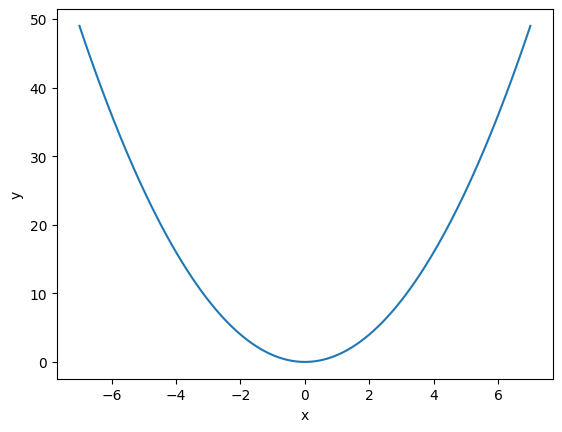

In [ ]:
def func(x):
    return x**2

xList = torch.linspace(-7, 7, 200)
yList = func(xList)

plt.plot(xList, yList)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<p style="font-family:B Nazanin" dir="rtl">
    از یک مقدار دلخواه شروع می‌کنیم و با یک نرخ یادگیری و محاسبه گرادیان تابع در هر مرحله تکرار، مرتب مقدار گرادیان را کاهش می‌دهیم. <br>
    نکته مهم در استفاده از grad این است که اگر بخواهیم مجددا گرادیان یک متغیر را حساب کنیم، قبل از آن باید مقدار grad را دستی صفر کنیم وگرنه این مقادیر با هم جمع می‌شود.
</p>

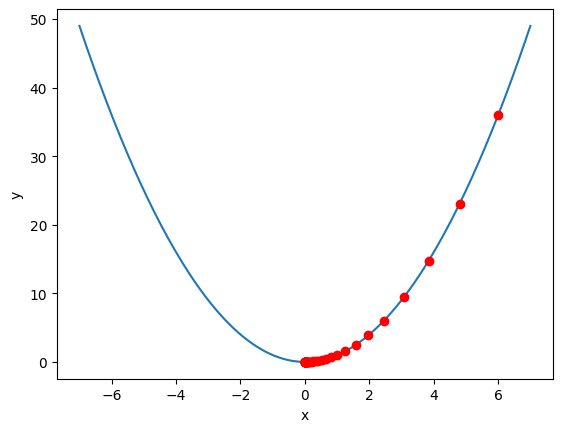

In [ ]:
x = torch.tensor(6., requires_grad=True)

N = 50      # iterations
eta = 0.1   # learning rate
xDatas = []

for i in range(N):
    xDatas.append(x.data.item())
    func(x).backward()
    x.data -= eta * x.grad
    x.grad.zero_()

yDatas = [func(torch.tensor(x)).item() for x in xDatas]
plt.plot(xList, yList)
plt.scatter(xDatas, yDatas, color='red', label='Gradient Descent Points', zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<p style="font-family:B Nazanin" dir="rtl">
    مثال دیگر:
</p>

$
y = x^4 - 8x^2 - 3x
$

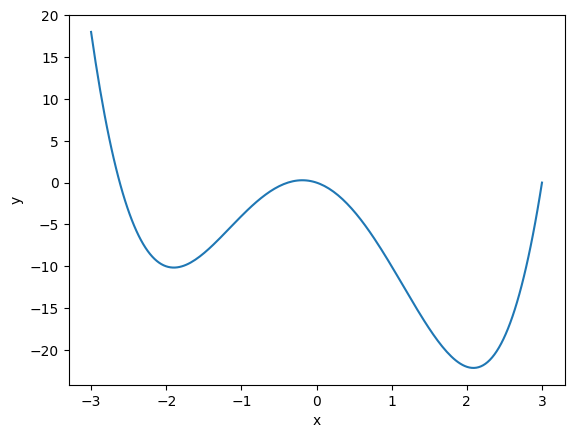

In [ ]:
def func2(x):
    return x**4 - 8*x**2 - 3*x

xList = torch.linspace(-3, 3, 200)
yList = func2(xList)

plt.plot(xList, yList)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

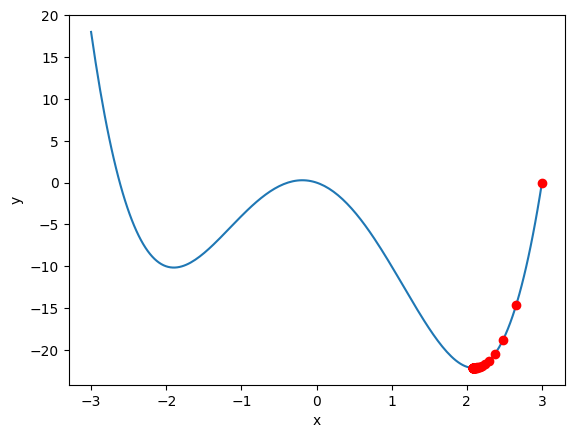

In [ ]:
x = torch.tensor(3., requires_grad=True)

N = 50      # iterations
eta = 0.006 # learning rate
xDatas = []

for i in range(N):
    xDatas.append(x.data.item())
    func2(x).backward()
    x.data -= eta * x.grad
    x.grad.zero_()

yDatas = [func2(torch.tensor(x)).item() for x in xDatas]
plt.plot(xList, yList)
plt.scatter(xDatas, yDatas, color='red', label='Gradient Descent Points', zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<p style="font-family:B Nazanin" dir="rtl">
    <b>پیاده‌سازی نورون‌ها با استفاده از کتابخانه PyTorch:</b><br>
    برای پیاده‌سازی یک شبکه عصبی ابتدا باید کلاسی را تعریف کنیم که بتواند رفتار یک نورون را شبیه‌سازی کند. فیلدهایی که کلاس نورون ذخیره می‌کند، تعداد ورودی‌ها (یا همان تعداد ضرایب) و تابع فعال‌ساز است. کد زیر یک نمونه پیاده‌سازی کلاس نورون است:
</p>

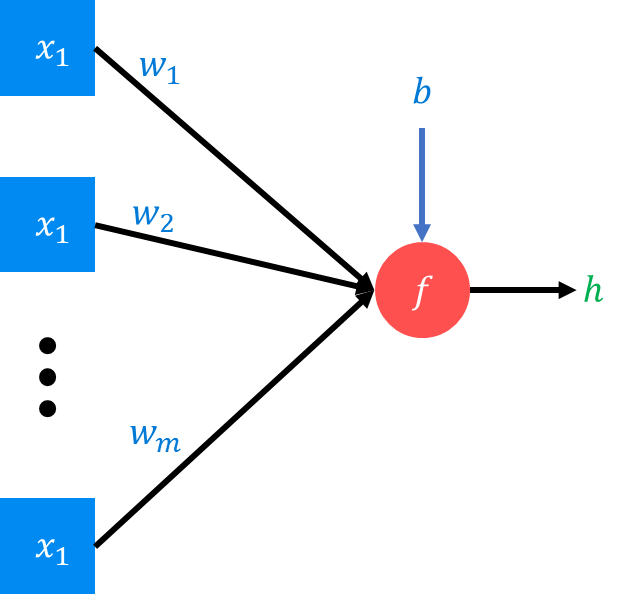

In [ ]:
import torch

In [ ]:
class Neuron:
    def __init__(self, n, af='linear'):
        self.w = torch.randn(n, requires_grad=True)
        self.b = torch.randn(1, requires_grad=True)
        self.af = af

    def __call__(self, X):
        z = self.w @ X + self.b
        print(f'w: {self.w}')
        print(f'b: {self.b}')
        print(f'z: {z.item()}')

        match self.af:
            case 'linear':
                return self.linear(z)
            case 'step':
                return self.step(z)
            case 'relu':
                return self.relu(z)
            case 'sigmoid':
                return self.sigmoid(z)

    def linear(self, x):
        return x

    def step(self, x):
        return (x>0).float()

    def relu(self, x):
        return torch.maximum(x, torch.tensor(0.0))          # Equivalent: torch.reli

    def sigmoid(self, x):                                   # Equivalent: torch.sigmoid()
        return 1 / (1 + torch.exp(-x))

In [ ]:
X = torch.tensor([3.0, 2.0, 1.0, 2., 0.])
Y = torch.tensor([0.3])

print(f'X: {X}')
print(f'Y: {Y}')

X: tensor([3., 2., 1., 2., 0.])
Y: tensor([0.3000])


In [ ]:
neuron1 = Neuron(5, 'sigmoid')
print(neuron1)

In [ ]:
y_pred = neuron1(X)
print(f'y_pred: {y_pred.item()}')

w: tensor([-1.0119, -0.8611, -1.7750,  0.4923,  0.8853], requires_grad=True)
b: tensor([0.2917], requires_grad=True)
z: -5.256350517272949
y_pred: 0.005187251605093479


In [ ]:
mse_loss = (y_pred - Y)**2
mse_loss

tensor([0.0869], grad_fn=<PowBackward0>)

<p style="font-family:B Nazanin" dir="rtl">
    خود کتابخانه PyTorch کلاس‌های از پیش تعریف‌شده‌ای دارد که رفتار نورون و شبکه‌های عصبی را شبیه‌سازی می‌نماید. برای این کار باید از ماژول nn این کتابخانه استفاده نماییم.
</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

<p style="font-family:B Nazanin" dir="rtl">
    به عنوان مثال یک نورون با دو ورودی و یک بایاس را در نظر بگیرید:
</p>

$
y = w_0 + w_1 x_1 + w_2 x_2
$

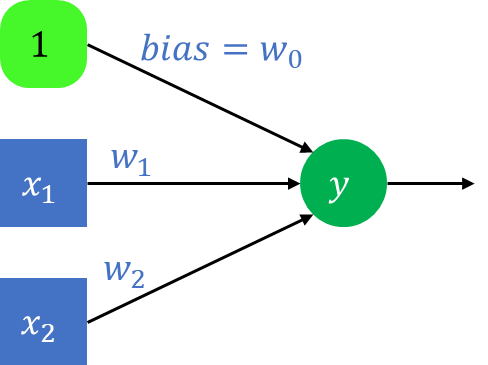

In [ ]:
# define input data
X = torch.tensor([1, -1], dtype=torch.float32)

# define a linear layer with bias
model = nn.Linear(in_features=2, out_features=1)

# display the bias and weights of the layer (random numbers at first)
print(f'Bias: {model.bias}')
print(f'Weights: {model.weight}')

Bias: Parameter containing:
tensor([0.6513], requires_grad=True)
Weights: Parameter containing:
tensor([[0.1184, 0.4009]], requires_grad=True)


In [ ]:
print(f'Bias: {model.bias.item()}')
print(f'Weights: {model.weight.detach().numpy()}')

Bias: 0.6512848138809204
Weights: [[0.11844301 0.40091902]]


In [ ]:
# compute the predicted output
y_pred = model(X)       # y_pred = bias + (1*w_0 + (-1)*w_1)

# display the features and predicted output
print(f'features: {X.detach().numpy()}')
print(f'y_pred: {y_pred.item()}')

features: [ 1. -1.]
y_pred: 0.3688088059425354


<p style="font-family:B Nazanin" dir="rtl">
    مثال دیگر. یک شبکه عصبی یک لایه با چهار ویژگی و دو خروجی.
</p>

$
y_1 = w_{0,1}+w_{1,1}x_1+w_{2,1}x_2+w_{3,1}x_3+w_{4,1}x_4\\
y_2 = w_{0,2}+w_{1,2}x_1+w_{2,2}x_2+w_{3,2}x_3+w_{4,2}x_4\\
$

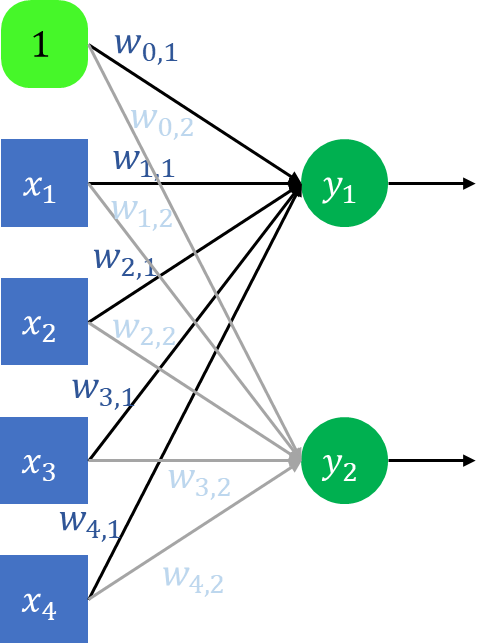

<p style="font-family:B Nazanin" dir="rtl">
    در این مثال می‌خواهیم یک دیتاست با 200 رکورد را به مدل بدهیم. پس ماتریس X ما ابعادی برابر با 200*4 خواهد داشت و ابعاد ماتریس y برابر با 200*2 خواهد بود.
</p>

In [ ]:
# input data and actual output
X = torch.randn(200, 4)
yt = torch.randn(200, 2)

# define a linear layer model with bias
model = nn.Linear(in_features=4, out_features=2, bias=True)

# display the bias and weights
print(f'Bias: {model.bias.detach().numpy()}')
print(f'Weights: {model.weight.detach().numpy()}')

Bias: [-0.20503229  0.05755579]
Weights: [[ 0.4828397   0.06989032 -0.40776932 -0.23797035]
 [ 0.32371497 -0.1081059  -0.3894369  -0.00294727]]


In [ ]:
# compute the predicted output
yp = model(X)

# calculate the mse loss
loss_fn = nn.MSELoss()
mse = loss_fn(yp, yt)
print(f'MSE: {mse.item():.3f}')

MSE: 1.404


<p style="font-family:B Nazanin" dir="rtl">
    همان طور که پیش‌تر توضیح داده شد، با یکبار اجرای این کار نمی‌توان به نتیجه دقیقی رسید. بلکه باید با استفاده از یک الگوریتم بهینه‌سازی این کار را تکرار کرد تا به بهترین مقادیر ممکن برای وزن‌ها و بایاس برسیم. در مثال زیر برای یک مدل با دو ویژگی و یک خروجی این بهینه‌سازی را انجام می‌دهیم:
</p>

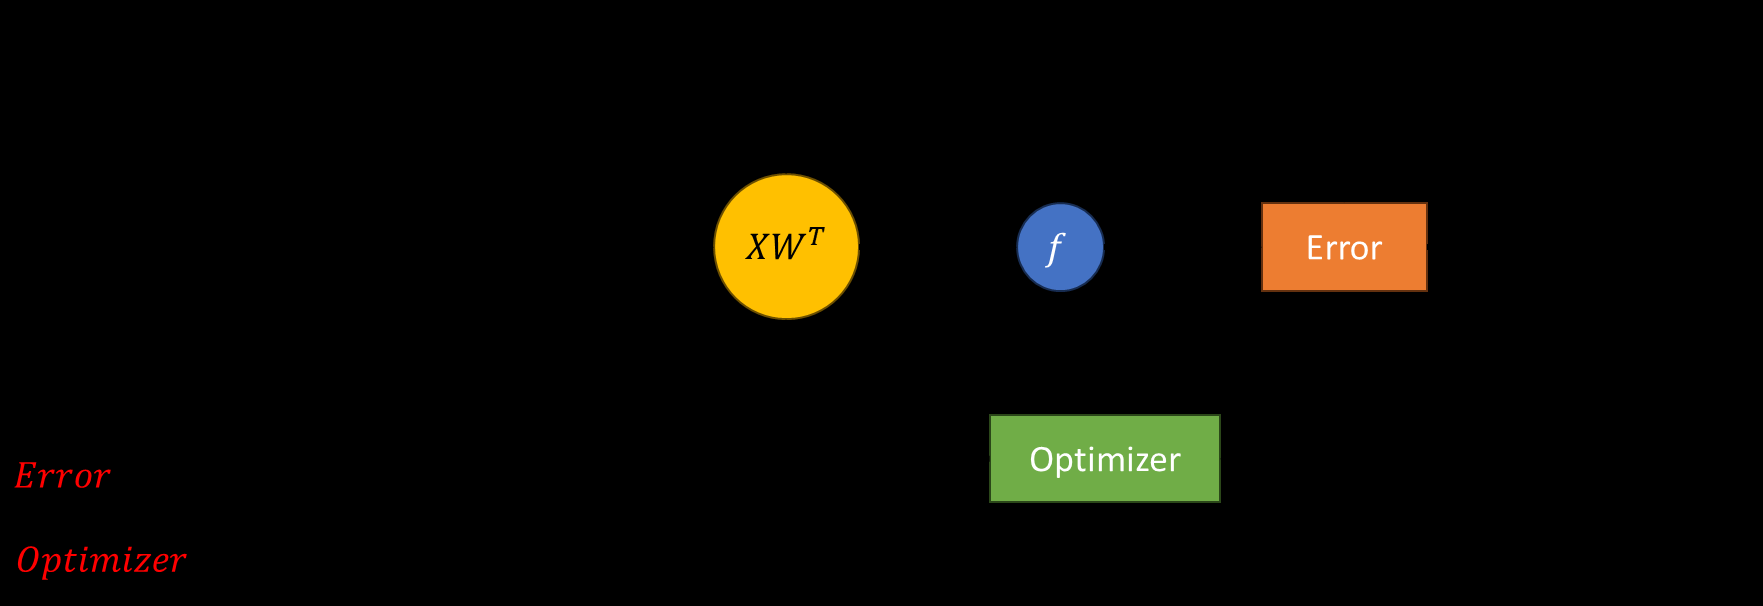

In [ ]:
x = torch.tensor([[1, -1]], dtype=torch.float32)
yt = torch.randn(1)

model = nn.Linear(in_features=2, out_features=1)
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(10):
    yp = model(x)
    mse = loss_fn(yp, yt)
    print(f'Bias: {model.bias.detach().numpy()}\tweight: {model.weight.detach().numpy()}\tMSE: {mse.item():.6f}')
    mse.backward()
    optimizer.step()
    optimizer.zero_grad()

Bias: [-0.32899585]	weight: [[ 0.28342086 -0.11637115]]	MSE: 0.357177
Bias: [-0.44852445]	weight: [[0.16389228 0.00315743]]	MSE: 0.057148
Bias: [-0.4963359]	weight: [[0.11608085 0.05096886]]	MSE: 0.009144
Bias: [-0.5154605]	weight: [[0.09695628 0.07009344]]	MSE: 0.001463
Bias: [-0.52311033]	weight: [[0.08930645 0.07774326]]	MSE: 0.000234
Bias: [-0.52617025]	weight: [[0.08624653 0.08080319]]	MSE: 0.000037
Bias: [-0.52739424]	weight: [[0.08502256 0.08202715]]	MSE: 0.000006
Bias: [-0.5278838]	weight: [[0.08453297 0.08251674]]	MSE: 0.000001
Bias: [-0.5280797]	weight: [[0.08433713 0.08271258]]	MSE: 0.000000
Bias: [-0.528158]	weight: [[0.08425881 0.0827909 ]]	MSE: 0.000000


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


<p style="font-family:B Nazanin" dir="rtl">
    تابع SGD یک optimizer یا بهینه‌ساز است که پارامترهای مدل و نرخ یادگیری را می‌گیرد و با استفاده از روش گرادیان کاهشی مقادیر وزن‌ها و بایاس را به روز می‌کند. با توجه به اینکه مقدار mse بر حسب وزن‌ها و بایاس حساب می‌شود می‌توانیم با کمک تابع backward از آن مشتق بگیریم. سپس با استفاده از تابع step مربوط به optimizer، به آن می‌گوییم که مقادیر وزن‌ها و بایاس را با کمک مشتق‌ها به‌روز کند و سپس همان‌طور که در قبل توضیح داده شد، مقادیر grad را صفر می‌کنیم (با کمک تابع zero_grad).
</p>

<p style="font-family:B Nazanin" dir="rtl">
    در مثال بعد یک دیتاست داریم که داده‌ها را از آن می‌خوانیم و یک مدل با استفاده از یک نورون می‌سازیم.
</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Darsman AI Course/Deep Learning/neuroun_test_dataset2.csv')
df

,x,y
0,-10.000000,-13.179738
1,-9.899497,-19.747958
2,-9.798995,-16.603798
3,-9.698492,-10.041765
4,-9.597990,-11.657185
...,...,...
195,9.597990,26.137243
196,9.698492,31.105184
197,9.798995,31.615008
198,9.899497,38.564923


In [ ]:
# Convert to pytorch tensors
X = torch.FloatTensor(df['x'].values).unsqueeze(1)
Y = torch.FloatTensor(df['y'].values).unsqueeze(1)

In [ ]:
# Standardization
X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

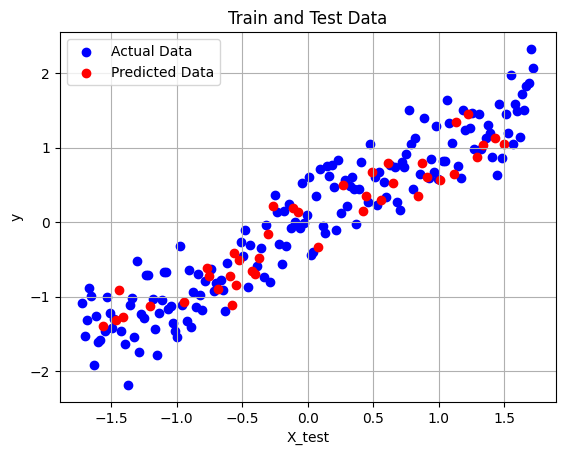

In [ ]:
# Plot training and test data
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Actual Data')
plt.scatter(X_test.numpy(), y_test.numpy(), color='red', label='Predicted Data')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Train and Test Data')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
torch.manual_seed(42)   # Set random seed
eta = 0.03              # Learning rate
N = 100                 # Number of epochs

model = nn.Linear(1, 1)                                             # Define a simple linear model
loss_fn = nn.MSELoss()                                              # Define a simple loss function
optimizer = torch.optim.SGD(params=model.parameters(), lr=eta)      # Define a simple optimizer

In [ ]:
# Train the model and record loss values for each epoch
loss_list=[]
for epoch in range(N):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    print(f"Epoch {epoch+1} => Loss: {loss:.6f}")       # Print current loss
    loss_list.append(loss.item())                       # Append current loss to list for plotting
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Epoch 1 => Loss: 0.824366
Epoch 2 => Loss: 0.742256
Epoch 3 => Loss: 0.669762
Epoch 4 => Loss: 0.605756
Epoch 5 => Loss: 0.549246
Epoch 6 => Loss: 0.499352
Epoch 7 => Loss: 0.455300
Epoch 8 => Loss: 0.416406
Epoch 9 => Loss: 0.382066
Epoch 10 => Loss: 0.351746
Epoch 11 => Loss: 0.324975
Epoch 12 => Loss: 0.301339
Epoch 13 => Loss: 0.280469
Epoch 14 => Loss: 0.262043
Epoch 15 => Loss: 0.245773
Epoch 16 => Loss: 0.231407
Epoch 17 => Loss: 0.218723
Epoch 18 => Loss: 0.207524
Epoch 19 => Loss: 0.197635
Epoch 20 => Loss: 0.188904
Epoch 21 => Loss: 0.181195
Epoch 22 => Loss: 0.174387
Epoch 23 => Loss: 0.168376
Epoch 24 => Loss: 0.163069
Epoch 25 => Loss: 0.158383
Epoch 26 => Loss: 0.154245
Epoch 27 => Loss: 0.150591
Epoch 28 => Loss: 0.147365
Epoch 29 => Loss: 0.144516
Epoch 30 => Loss: 0.142000
Epoch 31 => Loss: 0.139779
Epoch 32 => Loss: 0.137818
Epoch 33 => Loss: 0.136086
Epoch 34 => Loss: 0.134556
Epoch 35 => Loss: 0.133206
Epoch 36 => Loss: 0.132013
Epoch 37 => Loss: 0.130960
Epoch 38 =

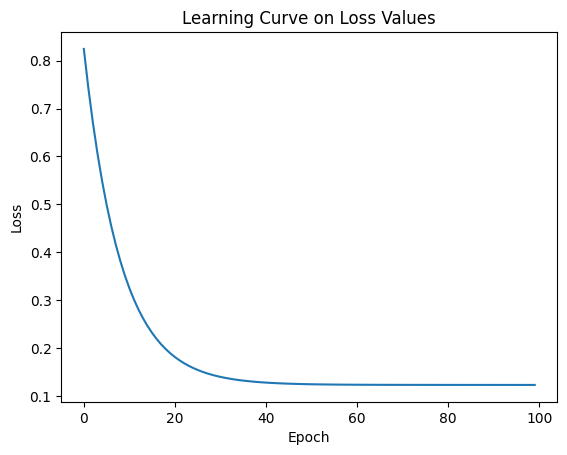

In [ ]:
# Plot the learning curve
plt.plot(range(N), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve on Loss Values')
plt.show()

In [ ]:
# Evaluate the model on the test data and compute L1 loss
y_predict = model(X_test)
l1_loss=nn.functional.l1_loss(y_predict, y_test)
print(f"L1 Loss : {l1_loss:.3f}")

L1 Loss : 0.237


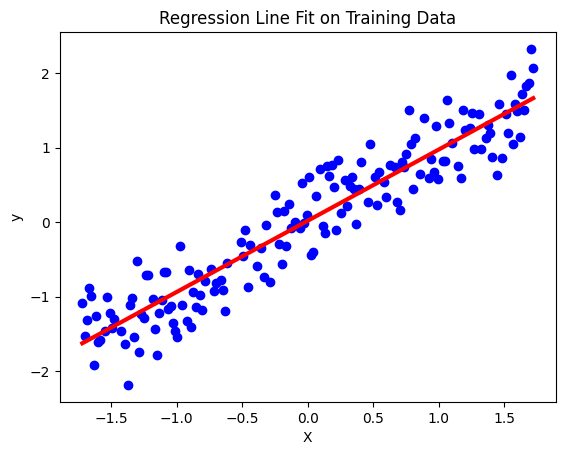

In [ ]:
# Plot of training data and model predictions

x_sample = torch.linspace(X_train.min(), X_train.max(), 50).unsqueeze(1)
yp = model(x_sample)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(x_sample.detach(), yp.detach(), color='red',linewidth=3, label='Model Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line Fit on Training Data')
plt.show()

<p style="font-family:B Nazanin" dir="rtl">
    <b>پیاده‌سازی چندین لایه از نورون‌ها با استفاده از PyTorch:</b><br>
    در قسمت قبل دیدیم که چگونه می‌توان یک نورون را با استفاده از کتابخانه PyTorch شبیه‌سازی کنیم. اما می‌دانیم که مسائل در واقعیت بسیار پیچیده‌تر از آن هستند که با یک نورون تنها بتوان آن‌ها را حل کرد. همان طور که می‌دانید در مسائل MLP می‌توانیم چندین لایه مخفی نیز داشته باشیم که هر کدام شامل تعداد زیادی نورون هستند. در اینجا مثال‌هایی را می‌بینیم که این شبیه‌سازی لایه‌های مختلف با نورون‌های متعدد را با استفاده از کتابخانه PyTorch انجام می‌دهیم.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    مثال. در این مثال از یک دیتاست تصادفی استفاده می‌کنیم که شامل 10 رکورد و هر رکورد شامل 3 ویژگی است.
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
x = torch.randint(low=-10, high=10, size=(10,3), dtype=torch.float)
print(f'x: \n{x}')

x: 
tensor([[ -9.,  -2.,   3.],
        [ -8.,   6.,  -1.],
        [  4.,   9.,   6.],
        [  8.,   4., -10.],
        [  0.,  -1.,   7.],
        [  5.,   2.,  -7.],
        [ -2.,   7.,  -4.],
        [-10.,   6.,  -6.],
        [  2.,  -1.,   2.],
        [  7.,   1.,  -6.]])


<p style="font-family:B Nazanin" dir="rtl">
    در این مثال دو لایه مخفی داریم. در لایه اول 7 نورون و در لایه دوم 5 نورون. همچنین می‌خواهیم که لایه خروجی بایاس نداشته باشد. دقت داشته باشید که تعداد خروجی‌های هر لایه حتما باید با ورودی‌های لایه بعد برابر باشد.
</p>

In [5]:
model1 = nn.Linear(3, 7)
model2 = nn.Linear(7, 5)

<p style="font-family:B Nazanin" dir="rtl">
    لایه خروجی نیز به صورت زیر است:
</p>

In [7]:
model3 = nn.Linear(5,1,bias=False)

In [8]:
mlp = nn.Sequential(model1, model2, model3)
print(f'MLP:\n{mlp}')
print(f'bias:\n{mlp[0].bias}')
print(f'weight:\n{mlp[0].weight}')
print(f'bias:\n{mlp[1].bias}')
print(f'weight:\n{mlp[1].weight}')
print(f'bias:\n{mlp[2].bias}')
print(f'weight:\n{mlp[2].weight}')

MLP:
Sequential(
  (0): Linear(in_features=3, out_features=7, bias=True)
  (1): Linear(in_features=7, out_features=5, bias=True)
  (2): Linear(in_features=5, out_features=1, bias=False)
)
bias:
Parameter containing:
tensor([-0.0569, -0.0020,  0.5715, -0.3903, -0.2328, -0.1393, -0.5014],
       requires_grad=True)
weight:
Parameter containing:
tensor([[-0.4653,  0.0749,  0.2699],
        [ 0.1404,  0.4691, -0.0766],
        [ 0.1932, -0.4157,  0.0866],
        [-0.3366,  0.2594, -0.0110],
        [-0.1892, -0.1404,  0.5429],
        [-0.3711, -0.0598,  0.4099],
        [ 0.3297,  0.3844,  0.5424]], requires_grad=True)
bias:
Parameter containing:
tensor([ 0.3077, -0.3736, -0.2498, -0.1140, -0.2344], requires_grad=True)
weight:
Parameter containing:
tensor([[-0.1210, -0.1052, -0.1546,  0.3000, -0.3285,  0.3011, -0.0105],
        [ 0.1084,  0.0459,  0.1176, -0.2100,  0.0213, -0.3731,  0.3435],
        [ 0.1140, -0.2775, -0.2177,  0.2716, -0.2661,  0.1251,  0.0917],
        [-0.0405,  0.223

<p style="font-family:B Nazanin" dir="rtl">
    در نهایت خروجی به صورت زیر می‌شود:
</p>

In [9]:
output = mlp(x)
print(f'Output:\n{output}')

Output:
tensor([[-0.6074],
        [-0.6560],
        [-0.3364],
        [ 0.5780],
        [-0.2875],
        [ 0.3729],
        [-0.2585],
        [-0.5929],
        [-0.0079],
        [ 0.4768]], grad_fn=<MmBackward0>)


<p style="font-family:B Nazanin" dir="rtl">
    مثال. در این مثال می‌خواهیم علاوه بر ساخت MLP، این بار با تعریف تابع هزینه و بهینه‌ساز، مقادیر خروجی را محاسبه کرده و با تکرار میزان تابع هزینه را کاهش دهیم.
</p>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [11]:
sample_num=40
feature_num=3
target_num=5
eta = 0.02
N = 100

x = torch.randint(low=-10,high=10,size=(sample_num,feature_num),dtype=torch.float)
yt = torch.randn(sample_num, target_num)

In [13]:
model1 = nn.Linear(feature_num, 7)
model2 = nn.Linear(7, target_num, bias=False)
mlp = nn.Sequential(model1,model2)
# print(f"bias:\n{mlp[0].bias}")
# print(f"weight:\n{mlp[0].weight}")
# print(f"bias:\n{mlp[1].bias}")
# print(f"weight:\n{mlp[1].weight }")

In [14]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(mlp.parameters(), lr=eta)

loss_list=[]
for epoch in range(N):
    yp = mlp(x)
    loss = loss_fn(yp, yt)
    loss_list.append(loss.item())
    print(f"Epoch {epoch+1} => Loss: {loss.item():.6f}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Epoch 1 => Loss: 2.482759
Epoch 2 => Loss: 1.832391
Epoch 3 => Loss: 1.513507
Epoch 4 => Loss: 1.332810
Epoch 5 => Loss: 1.221313
Epoch 6 => Loss: 1.148428
Epoch 7 => Loss: 1.098720
Epoch 8 => Loss: 1.063682
Epoch 9 => Loss: 1.038318
Epoch 10 => Loss: 1.019545
Epoch 11 => Loss: 1.005383
Epoch 12 => Loss: 0.994522
Epoch 13 => Loss: 0.986070
Epoch 14 => Loss: 0.979406
Epoch 15 => Loss: 0.974087
Epoch 16 => Loss: 0.969794
Epoch 17 => Loss: 0.966292
Epoch 18 => Loss: 0.963404
Epoch 19 => Loss: 0.960999
Epoch 20 => Loss: 0.958975
Epoch 21 => Loss: 0.957254
Epoch 22 => Loss: 0.955775
Epoch 23 => Loss: 0.954491
Epoch 24 => Loss: 0.953365
Epoch 25 => Loss: 0.952367
Epoch 26 => Loss: 0.951473
Epoch 27 => Loss: 0.950666
Epoch 28 => Loss: 0.949929
Epoch 29 => Loss: 0.949250
Epoch 30 => Loss: 0.948621
Epoch 31 => Loss: 0.948033
Epoch 32 => Loss: 0.947480
Epoch 33 => Loss: 0.946956
Epoch 34 => Loss: 0.946458
Epoch 35 => Loss: 0.945981
Epoch 36 => Loss: 0.945523
Epoch 37 => Loss: 0.945081
Epoch 38 =

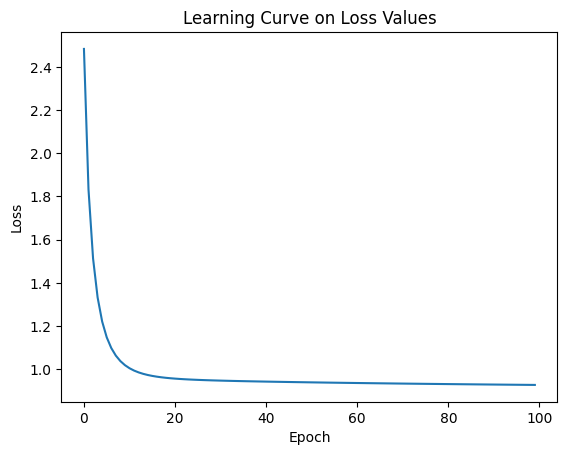

In [15]:
plt.plot(range(N), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve on Loss Values')
plt.show()

<p style="font-family:B Nazanin" dir="rtl">
    مثال. در این مثال می‌خواهیم با استفاده از امکانات پیشرفته زبان پایتون و کلاس‌های پایه‌ای که کتابخانه PyTorch‌ در اختیار ما می‌گذارد، یک کلاس تعریف کنیم که ساخت مدل‌های دو لایه را برای ما به صورت خودکار انجام دهد.<br>
    کلاس <code>nn.Module</code> یک کلاس پایه در این کتابخانه است که با استفاده از آن می‌توان یک ساختار درختی از لایه‌های مختلف را در یک شبکه عصبی ایجاد کنیم.<br>
    تابع <code>forward</code> تابعی است که زمانی که مدل MLP را فراخوانی می‌کنیم، اجرا می‌شود و در آن می‌توانیم ترتیب اجرای لایه‌ها را مشخص کنیم.
</p>

In [17]:
import torch
import torch.nn as nn

In [18]:
class TwoLayerModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [19]:
model = TwoLayerModel(input_size=2, hidden_size=5, output_size=3)
x1 = torch.tensor([-7., -2.])
output1 = model(x1)
print(f"x1:\n{ x1}",)
print(f"Output1:\n{ output1}",)

x1:
tensor([-7., -2.])
Output1:
tensor([-0.3070, -0.8165,  1.3638], grad_fn=<ViewBackward0>)


In [20]:
x2 = torch.randint(low=-10,high=10,size=(20,2),dtype=torch.float)
output2 = model(x2)
print(f"x2:\n{ x2}",)
print(f"Output2:\n{ output2}",)

x2:
tensor([[ -5.,  -1.],
        [ -1.,  -6.],
        [ -9.,   4.],
        [ -4.,   2.],
        [  8.,  -1.],
        [ -5.,   5.],
        [ -6.,   9.],
        [ -9., -10.],
        [  6.,  -5.],
        [ -1.,   1.],
        [  9.,  -4.],
        [  8.,  -9.],
        [ -5.,  -1.],
        [ -5.,  -6.],
        [  1.,  -3.],
        [ -1.,  -1.],
        [  0.,  -2.],
        [-10.,   2.],
        [  9.,   4.],
        [ -9.,  -5.]])
Output2:
tensor([[-0.3062, -0.6030,  0.9390],
        [ 0.4240, -1.0893,  0.2293],
        [-0.5476, -0.3768,  2.4453],
        [-0.3913, -0.2630,  0.9612],
        [ 2.5530, -1.8370,  1.1513],
        [-0.5116, -0.0432,  1.5019],
        [-0.7122,  0.1205,  2.0728],
        [-0.0682, -1.6831,  1.1319],
        [ 2.2659, -1.7475,  1.0899],
        [-0.3001, -0.1803,  0.1018],
        [ 3.1221, -2.2116,  1.3963],
        [ 3.2335, -2.4961,  1.4505],
        [-0.3062, -0.6030,  0.9390],
        [-0.1928, -1.0242,  0.5268],
        [ 0.6442, -0.9134,  

<p style="font-family:B Nazanin" dir="rtl">
    مثال. در مثال آخر می‌خواهیم تعداد لایه‌ها به صورت پویا قابل تعریف باشد.
</p>

In [21]:
import torch
import torch.nn as nn

In [22]:
class DynamicLayerModel(nn.Module):
    def __init__(self, layer_sizes):
        super(DynamicLayerModel, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))


    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x) if i == len(self.layers) - 1 else torch.relu(layer(x))
        return x

In [23]:
layer_sizes = [2, 5, 3, 1]                # [input_size, hidden1, hidden2, ..., output_size]
model = DynamicLayerModel(layer_sizes)

x3 = torch.randint(low=-10,high=10,size=(20,2),dtype=torch.float)
output3 = model(x3)
print(f"x2:\n{ x3}",)
print(f"Output2:\n{ output3}",)

x2:
tensor([[  0.,   7.],
        [  6.,   4.],
        [  1., -10.],
        [  1.,   4.],
        [  5.,  -2.],
        [ -4.,   9.],
        [  1.,   6.],
        [  8.,   2.],
        [  3.,   9.],
        [  2.,   5.],
        [  2.,   0.],
        [  7.,  -6.],
        [ -2.,  -7.],
        [ -9.,  -2.],
        [ -5.,   2.],
        [  9.,  -3.],
        [ -6.,  -8.],
        [ -5.,   4.],
        [ -9.,  -8.],
        [  7.,   4.]])
Output2:
tensor([[ 0.8955],
        [ 0.4471],
        [-0.2775],
        [ 0.5919],
        [ 0.0356],
        [ 1.2984],
        [ 0.7619],
        [ 0.1822],
        [ 0.9199],
        [ 0.6284],
        [ 0.2017],
        [-0.1681],
        [-0.0970],
        [ 0.6944],
        [ 0.7744],
        [-0.0864],
        [-0.1110],
        [ 0.9641],
        [-0.0507],
        [ 0.4529]], grad_fn=<AddmmBackward0>)
